In [2]:
import pandas as pd

/Users/mercybenzaquen/.virtualenvs/Homework11/lib/python3.5/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/mercybenzaquen/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


In [3]:
!head -n 10000 violations.csv > small-violations.csv

In [4]:
df = pd.read_csv('small-violations.csv')

In [5]:
df.tail()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
9994,1349995721,GBJ4159,NY,PAS,07/27/2013,71,SDN,TOYOT,P,25935,...,BLUE,0,2004,-,0,NaN,NaN,NaN,NaN,NaN
9995,1349995733,JDD3205,PA,PAS,07/13/2013,40,SDN,NISSA,P,24740,...,GY,0,0,-,1,NaN,NaN,NaN,NaN,NaN
9996,1349995745,GFD4344,NY,PAS,07/13/2013,40,SDN,CHRYS,P,29090,...,GY,0,2013,-,5,NaN,NaN,NaN,NaN,NaN
9997,1349995836,GCG2966,NY,PAS,08/07/2013,74,SDN,NISSA,P,24090,...,BLACK,0,2005,-,0,NaN,NaN,NaN,NaN,NaN
9998,1349995850,GGH5393,NY,PAS,08/04/2013,74,SDN,HYUND,P,0,...,RED,0,1998,-,0,NaN,NaN,NaN,NaN,NaN


# 1. I want to make sure my Plate ID is a string. Can't lose the leading zeroes!

In [6]:
df.columns

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation'],
      dtype='object')

In [7]:
def plate_to_str(plate):
    return str(plate)

print(type(plate_to_str('GBB9093')))
print((plate_to_str('GBB9093')))

<class 'str'>
GBB9093


In [8]:
col_types = { 'Plate ID': 'str' }
df = pd.read_csv("small-violations.csv", dtype=col_types)
df.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,...,GY,0,2013,-,0,NaN,NaN,NaN,NaN,NaN
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,...,WH,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,...,NaN,0,0,-,0,NaN,NaN,NaN,NaN,NaN
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,...,WH,0,2010,-,0,NaN,NaN,NaN,NaN,NaN
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,...,BR,0,2012,-,0,NaN,NaN,NaN,NaN,NaN


In [9]:
df['Violation Code'].dtype

dtype('int64')

# 2. I don't think anyone's car was built in 0AD. Discard the '0's as NaN.


In [10]:
col_types = { 'Plate ID': 'str' }
df = pd.read_csv("small-violations.csv", dtype=col_types, na_values={'Vehicle Year':'0'})
df.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,...,GY,0,2013.0,-,0,NaN,NaN,NaN,NaN,NaN
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,...,WH,0,2012.0,-,0,NaN,NaN,NaN,NaN,NaN
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,...,NaN,0,NaN,-,0,NaN,NaN,NaN,NaN,NaN
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,...,WH,0,2010.0,-,0,NaN,NaN,NaN,NaN,NaN
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,...,BR,0,2012.0,-,0,NaN,NaN,NaN,NaN,NaN


# 3. I want the dates to be dates! Read the read_csv documentation to find out how to make pandas automatically parse dates.

*Issue Date

*Vehicle Expiration Date

*Date First Observed


In [11]:
# ['Issue Date', 'Vehicle Expiration Date', 'Date First Observed']
col_types = { 'Plate ID': 'str' }

df = pd.read_csv("small-violations.csv", dtype=col_types, na_values={'Vehicle Year':'0'}, 
                 parse_dates = ['Issue Date'],
                 infer_datetime_format= True)
df.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1283294138,GBB9093,NY,PAS,2013-08-04,46,SUBN,AUDI,P,37250,...,GY,0,2013.0,-,0,NaN,NaN,NaN,NaN,NaN
1,1283294151,62416MB,NY,COM,2013-08-04,46,VAN,FORD,P,37290,...,WH,0,2012.0,-,0,NaN,NaN,NaN,NaN,NaN
2,1283294163,78755JZ,NY,COM,2013-08-05,46,P-U,CHEVR,P,37030,...,NaN,0,NaN,-,0,NaN,NaN,NaN,NaN,NaN
3,1283294175,63009MA,NY,COM,2013-08-05,46,VAN,FORD,P,37270,...,WH,0,2010.0,-,0,NaN,NaN,NaN,NaN,NaN
4,1283294187,91648MC,NY,COM,2013-08-08,41,TRLR,GMC,P,37240,...,BR,0,2012.0,-,0,NaN,NaN,NaN,NaN,NaN


In [12]:
df['Issue Date']

0      2013-08-04
1      2013-08-04
2      2013-08-05
3      2013-08-05
4      2013-08-08
5      2013-08-11
6      2013-08-11
7      2013-08-07
8      2013-08-07
9      2013-07-18
10     2013-07-18
11     2013-07-18
12     2013-07-31
13     2013-08-12
14     2013-07-05
15     2013-08-12
16     2013-07-26
17     2013-07-30
18     2013-07-23
19     2013-07-29
20     2013-08-07
21     2013-07-20
22     2013-07-18
23     2013-07-20
24     2013-08-10
25     2013-07-26
26     2013-07-19
27     2013-08-06
28     2013-08-07
29     2013-08-06
          ...    
9969   2013-07-23
9970   2013-08-13
9971   2013-07-16
9972   2013-07-16
9973   2013-08-15
9974   2013-08-13
9975   2013-08-07
9976   2013-07-31
9977   2013-07-27
9978   2013-07-17
9979   2013-07-15
9980   2013-07-21
9981   2013-08-10
9982   2013-08-09
9983   2013-08-09
9984   2013-08-09
9985   2013-08-09
9986   2013-07-23
9987   2013-07-23
9988   2013-07-23
9989   2013-07-25
9990   2013-08-14
9991   2013-08-14
9992   2013-08-04
9993   201

### I was having trouble trying to convert all date columns to dates when reading the csv so I created functions and store the data in new colums

In [13]:
import dateutil.parser

In [14]:
def date_converter(x):
    try:
        x = str(x)
        date_clean = dateutil.parser.parse(x)
        print("printing date")
        return date_clean.strftime("%Y-%d-%m" )
    except:
        print("not printing date")
        return None

In [15]:
df['Vehicle Expiration Date'].apply(date_converter)

printing date
printing date
printing date
printing date
not printing date
not printing date
printing date
not printing date
printing date
not printing date
printing date
printing date
printing date
printing date
not printing date
printing date
printing date
not printing date
printing date
not printing date
not printing date
printing date
not printing date
printing date
not printing date
printing date
printing date
not printing date
printing date
printing date
not printing date
not printing date
not printing date
not printing date
not printing date
printing date
printing date
not printing date
printing date
printing date
not printing date
printing date
printing date
not printing date
not printing date
printing date
not printing date
printing date
printing date
printing date
printing date
printing date
not printing date
printing date
not printing date
printing date
printing date
printing date
printing date
printing date
printing date
printing date
printing date
printing date
printing dat

0       2014-31-08
1       2014-30-04
2       2014-28-02
3       2014-31-10
4             None
5             None
6       2014-23-12
7             None
8       2014-22-07
9             None
10      2014-10-05
11      2014-08-10
12      2015-31-03
13      2014-13-07
14            None
15      2014-29-07
16      2015-28-01
17            None
18      2014-30-09
19            None
20            None
21      2014-05-07
22            None
23      2014-06-12
24            None
25      2014-30-09
26      2014-31-10
27            None
28      2014-31-03
29      2015-21-03
           ...    
9969    2014-01-03
9970          None
9971    2013-31-08
9972    2014-05-06
9973    2013-02-09
9974    2015-17-04
9975    2015-11-02
9976    2014-23-04
9977    2014-25-11
9978    2015-08-07
9979    2015-24-03
9980    2013-20-08
9981    2013-11-08
9982    2013-27-06
9983    2013-27-06
9984          None
9985    2015-03-04
9986    2014-10-06
9987    2014-21-08
9988          None
9989    2014-30-04
9990    2014

In [16]:
df['Vehicle Expiration Date clean'] = df['Vehicle Expiration Date'].apply(date_converter)

printing date
printing date
printing date
printing date
not printing date
not printing date
printing date
not printing date
printing date
not printing date
printing date
printing date
printing date
printing date
not printing date
printing date
printing date
not printing date
printing date
not printing date
not printing date
printing date
not printing date
printing date
not printing date
printing date
printing date
not printing date
printing date
printing date
not printing date
not printing date
not printing date
not printing date
not printing date
printing date
printing date
not printing date
printing date
printing date
not printing date
printing date
printing date
not printing date
not printing date
printing date
not printing date
printing date
printing date
printing date
printing date
printing date
not printing date
printing date
not printing date
printing date
printing date
printing date
printing date
printing date
printing date
printing date
printing date
printing date
printing dat

ValueError: I/O operation on closed file

In [ ]:
df['Vehicle Expiration Date clean'].value_counts()

In [17]:
df['Date First Observed']

0              0
1              0
2              0
3              0
4              0
5              0
6              0
7              0
8              0
9              0
10             0
11             0
12             0
13             0
14             0
15             0
16             0
17             0
18             0
19             0
20             0
21             0
22             0
23             0
24             0
25             0
26             0
27             0
28             0
29             0
          ...   
9969    20130723
9970           0
9971           0
9972           0
9973           0
9974           0
9975           0
9976           0
9977           0
9978           0
9979           0
9980           0
9981           0
9982           0
9983           0
9984           0
9985           0
9986           0
9987           0
9988           0
9989           0
9990           0
9991           0
9992           0
9993           0
9994           0
9995           0
9996          

In [18]:
df['Date First Observed clean'] = df['Date First Observed'].apply(date_converter)

not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
printing date
printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
not printing date
printing date
not printing date
not printing date
not 

In [19]:
df['Date First Observed clean'].value_counts()

2013-22-07    24
2013-31-07    23
2013-02-08    21
2013-30-07    19
2013-12-08    18
2013-09-08    16
2013-24-07    14
2013-20-07    13
2013-18-07    13
2013-13-08    12
2013-05-08    12
2013-10-08    11
2013-01-08    11
2013-11-08    11
2013-14-08    11
2013-07-08    10
2013-03-08    10
2013-25-07    10
2013-26-07    10
2013-19-07     9
2013-17-07     9
2013-06-08     9
2013-29-07     9
2013-23-07     9
2013-21-07     8
2013-04-08     8
2013-12-07     8
2013-27-07     7
2013-11-07     6
2013-28-07     6
              ..
2013-20-08     4
2013-16-08     2
2013-25-08     2
2013-09-07     2
2013-22-08     2
2013-15-07     2
2015-11-07     1
2013-08-07     1
2013-24-06     1
2013-23-08     1
2013-28-06     1
2013-10-06     1
2013-26-08     1
2013-09-06     1
2013-18-08     1
2013-14-07     1
2013-03-07     1
2031-03-08     1
2013-01-07     1
2014-12-05     1
2027-27-07     1
2014-12-08     1
2013-30-06     1
2031-01-08     1
2013-29-06     1
2013-22-06     1
2013-04-06     1
2013-19-08    

# 4. "Date first observed" is a pretty weird column, but it seems like it has a date hiding inside. Using a function with .apply, transform the string (e.g. "20140324") into a Python date. Make the 0's show up as NaN.

In [20]:
import numpy as np

In [21]:
def date_first_observed_converter(x):
    try:
        x= str(x)
        if x == '0':
            print('printing nan for 0')
            return np.nan
        else:
            date_clean = dateutil.parser.parse(x)
            return date_clean.strftime("%Y-%d-%m")
    except:
        return None

In [22]:
date_first_observed_converter(df['Date First Observed'])

In [23]:
df['Date First Observed clean 2']=df['Date First Observed'].apply(date_first_observed_converter)

printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan for 0
printing nan

In [24]:
df['Date First Observed clean 2'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Date First Observed clean 2, dtype: object

# 5. "Violation time" is... not a time. Make it a time.

In [25]:
df['Violation Time'].head()

0    0752A
1    1240P
2    1243P
3    0232P
4    1239P
Name: Violation Time, dtype: object

In [26]:
df['Violation Time'].value_counts()

0840A    55
0815A    48
1140A    47
0845A    46
0810A    45
0920A    42
0900A    42
0740A    41
0850A    40
1150A    39
0915A    39
1120A    39
0806A    38
0945A    38
0940A    36
1130A    36
1145A    35
1155A    35
0905A    33
0736A    33
0830A    33
1010A    32
1210P    31
1015A    31
0100A    31
0930A    31
1000A    30
0500P    30
0808A    29
1205P    28
         ..
0857P     1
0909P     1
0527A     1
0337P     1
0143P     1
0207A     1
0944P     1
0502A     1
0719P     1
0516A     1
0546A     1
1221A     1
0744P     1
0126P     1
0421P     1
1257P     1
0233A     1
0548P     1
1041P     1
1001P     1
0648P     1
0044A     1
0339A     1
0949P     1
0948P     1
0838P     1
0301P     1
0354P     1
0749P     1
0151P     1
Name: Violation Time, dtype: int64

In [27]:
df['Violation Time']

0       0752A
1       1240P
2       1243P
3       0232P
4       1239P
5       0617P
6       0741P
7       0425A
8       0437A
9       0839A
10      0845A
11      0907A
12      0514P
13      0656P
14      1145P
15      0546P
16      1142A
17      0724A
18      0758A
19      0736A
20      0847A
21      1120A
22      1020A
23      0324P
24      1018A
25      0743A
26      0850A
27      0915A
28      1023A
29      1120A
        ...  
9969    1251P
9970    0645P
9971    0230A
9972    0315A
9973    0230A
9974    1213P
9975    0830A
9976    0305A
9977    0855A
9978    1021A
9979    0330A
9980    0524P
9981    0505P
9982    1018P
9983    1018P
9984    0215A
9985    0130A
9986    1020P
9987    1000P
9988    1000P
9989    1030P
9990    1115A
9991    0842A
9992    1150A
9993    1141A
9994    1140A
9995    0315P
9996    0310P
9997    1026A
9998    0148P
Name: Violation Time, dtype: object

In [28]:
def violation_time_to_time(x):
    try:
        hour = x[0:2]
        minutes = x[2:4]
        pam= x[4]
        complete_time= hour + ":" + minutes + " " + pam + 'm'
        new_violation_time = dateutil.parser.parse(complete_time)
        return new_violation_time.strftime("%H:%M%p")
    except:
        return None
   

In [29]:
df['Violation Time clean']= df['Violation Time'].apply(violation_time_to_time)

# 6.  There sure are a lot of colors of cars, too bad so many of them are the same. Make "BLK" and "BLACK", "WT" and "WHITE", and any other combinations that you notice.

In [30]:
def abrev_to_color(color):
    if (color == "BK") or (color == "BL") or (color == 'BLACK'):
            return 'BLACK'
    if (color == "WHT") or (color == "WT") or (color == 'WH'):
            return 'WHITE'
    else:
            return color
        
abrev_to_color('BK')  
abrev_to_color('WT')  

'WHITE'

In [31]:
df['Vehicle Color clean'] = df['Vehicle Color'].apply(abrev_to_color)

In [32]:
df['Vehicle Color clean'].value_counts()

WHITE    2627
BLACK    1538
GY        637
BLUE      607
GRAY      553
RED       525
BLK       487
SILVE     392
GREY      363
BROWN     305
GREEN     268
TAN       173
GRY       167
GOLD      116
BR        116
YELLO     114
RD        104
SILVR      83
GR         57
GRN        51
TN         45
ORANG      41
SILV       34
BRN        34
SIL        29
BLU        25
GN         23
MAROO      20
SL         18
PURPL      15
         ... 
D.BLU       1
GY/BE       1
PINK        1
CHAMP       1
BLE         1
LIGHT       1
BUR         1
VAN         1
WYH         1
TH          1
WOOD        1
YW/BL       1
MARON       1
PUR         1
LT.GR       1
BWN         1
RUST        1
WWHIT       1
BU          1
NAVY/       1
B LUE       1
VLACK       1
BG          1
BT          1
PEARL       1
BLACL       1
B           1
METBL       1
B;L         1
SLIVE       1
Name: Vehicle Color clean, dtype: int64

In [33]:
# new_list_colors = list(df['Vehicle Color'].values.flatten())
# new_list_str= []
# for item in new_list_colors:
#     if isinstance(item, str):
#         new_list_str.append(item)
#     #else:
#         #print(item)
        
# #new_list_str
# strings= new_list_str.sort()

# new_list_str

# 7. Join the data with the Parking Violations Code dataset from the NYC Open Data site.


In [34]:
!head -n 10000 DOF_Parking_Violation_Codes.csv > small_DOF_Parking_Violation_Codes.csv

In [35]:
violations_code = pd.read_csv("DOF_Parking_Violation_Codes.csv")

In [36]:
violations_code.head()

,CODE,DEFINITION,Manhattan 96th St. & below,All Other Areas
0,10,"Stopping, standing or parking where a sign, st...",$115,$115
1,11,Hotel Loading/Unloading: Standing or parking w...,$115,$115
2,12,Snow Emergency: Standing or parking where stan...,$95,$95
3,13,Taxi Stand: Standing or parking where standing...,$115,$115
4,14,General No Standing: Standing or parking where...,$115,$115


In [37]:
violations_code['CODE'].dtype

dtype('O')

In [38]:
violations_code['CODE'].value_counts()

20       1
19       1
05       1
12       1
57       1
92       1
99       1
59       1
10       1
37-38    1
52       1
86       1
26       1
43       1
24       1
44       1
68       1
94       1
96       1
93       1
14       1
40       1
13       1
89       1
85       1
28       1
22       1
70       1
21       1
72       1
        ..
50       1
45       1
61       1
39       1
46       1
04       1
84       1
62       1
58       1
27       1
25       1
35       1
11       1
97       1
07       1
55       1
42       1
83       1
08       1
48       1
51       1
16       1
67       1
73       1
09       1
18       1
82       1
31       1
53       1
63       1
Name: CODE, dtype: int64

In [39]:
def many_codes_to_one_code(x):
    try:
        single_code = x[0:2]
        return single_code
    except:
        return None
   

In [40]:
one_code = violations_code['CODE'].apply(many_codes_to_one_code)

In [41]:
violations_code['CODE_in_int'] = one_code.astype(int)

In [42]:
violations_code['CODE_in_int'].dtype

dtype('int64')

In [43]:
new_df= df.merge(violations_code, left_on='Violation Code', right_on='CODE_in_int')

In [44]:
new_df.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Double Parking Violation,Date First Observed clean,Date First Observed clean 2,Violation Time clean,Vehicle Color clean,CODE,DEFINITION,Manhattan 96th St. & below,All Other Areas,CODE_in_int
0,1283294138,GBB9093,NY,PAS,2013-08-04,46,SUBN,AUDI,P,37250,...,NaN,None,NaN,07:52AM,GY,46,Standing or parking on the roadway side of a v...,$115,$115,46
1,1283294151,62416MB,NY,COM,2013-08-04,46,VAN,FORD,P,37290,...,NaN,None,NaN,12:40PM,WHITE,46,Standing or parking on the roadway side of a v...,$115,$115,46
2,1283294163,78755JZ,NY,COM,2013-08-05,46,P-U,CHEVR,P,37030,...,NaN,None,NaN,12:43PM,NaN,46,Standing or parking on the roadway side of a v...,$115,$115,46
3,1283294175,63009MA,NY,COM,2013-08-05,46,VAN,FORD,P,37270,...,NaN,None,NaN,14:32PM,WHITE,46,Standing or parking on the roadway side of a v...,$115,$115,46
4,1290834349,429J6JM,NY,COM,2013-07-23,46,DELV,INTER,P,0,...,NaN,None,NaN,10:37AM,BR,46,Standing or parking on the roadway side of a v...,$115,$115,46


# 8. How much money did NYC make off of parking violations?
I ignored. I was trying to include them but I could not find the way :(! 

*$200 (Heavy Tow, plus violation fine)        

*2nd Offense - $265\n2nd Offense - $515

I will keep working in it, but these results are without including these two types of fines.

In [45]:
new_df['All Other Areas'].value_counts()


$115                                      4015
$45                                       2414
$65                                       1333
$60                                       1078
$95                                        650
$165                                       138
$180                                        82
vary                                        74
$35                                         50
$200 (Heavy Tow, plus violation fine)        6
2nd Offense - $265\n2nd Offense - $515       5
Name: All Other Areas, dtype: int64

In [46]:
new_df['All Other Areas'].dtype

dtype('O')

In [55]:
import re

In [56]:
def random_to_money(x):
    try:
        #print("This is our item:", x)
        if re.search(r"^\$", x):
            #print("Removing $")
        
            cost_in_numbers = x[1:4]
            #print(cost_in_numbers)
        
            return cost_in_numbers
    
        elif isinstance(x, float):
            return x
    
        else:
            #print("returning none")
            return None
    except:
        return

In [57]:
random_to_money('vary')

In [58]:
new_df['All Other Areas'].apply(random_to_money)

0        115
1        115
2        115
3        115
4        115
5        115
6        115
7        115
8        115
9        115
10       115
11       115
12       115
13       115
14       115
15       115
16       115
17       115
18       115
19       115
20       115
21       115
22       115
23       115
24       115
25       115
26       115
27       115
28       115
29       115
        ... 
9816     65 
9817     65 
9818     65 
9819     65 
9820     115
9821     115
9822     115
9823     115
9824     115
9825     115
9826     95 
9827    None
9828     115
9829     115
9830     115
9831     115
9832     65 
9833     65 
9834     95 
9835     95 
9836     95 
9837     95 
9838     95 
9839     95 
9840     115
9841     115
9842     115
9843     115
9844     45 
9845     115
Name: All Other Areas, dtype: object

In [60]:
new_df['All Other Areas clean'] = new_df['All Other Areas'].apply(random_to_money)

In [61]:
new_df['All Other Areas clean'].value_counts()

115    4015
45     2414
65     1333
60     1078
95      650
165     138
180      82
35       50
200       6
Name: All Other Areas clean, dtype: int64

In [62]:
def str_to_int(x):
    try:
        return int(x)
    except:
        return None 

In [63]:
new_df['All Other Areas clean int'] = new_df['All Other Areas clean'].apply(str_to_int)

In [86]:
new_df['All Other Areas clean int'].value_counts()

115.0    4015
45.0     2414
65.0     1333
60.0     1078
95.0      650
165.0     138
180.0      82
35.0       50
200.0       6
Name: All Other Areas clean int, dtype: int64

In [64]:
for item in new_df['All Other Areas clean int']:
    print(type(item))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.fl

In [65]:
total_money_from_fines = new_df['All Other Areas clean int'].sum()
print("NYC made at least",total_money_from_fines, "in fines" )

NYC made at least 823910.0 in fines


# 9. What's the most lucrative kind of parking violation? The most frequent?


In [81]:
most_lucrative_violation = new_df.groupby('CODE')['All Other Areas clean int'].mean().sort_values(ascending=False).head(8)


In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

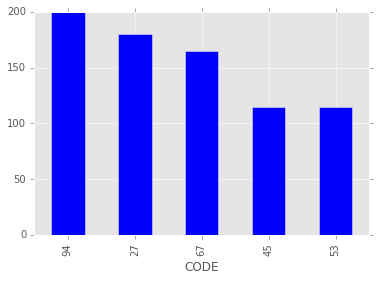

In [83]:
most_lucrative_violation.head().plot(kind="bar", color = 'blue')
#most_lucrative_violation.plt.xlabel(' Violation Code')
#most_lucrative_violation.plt.ylabel('Fee')

# 10. New Jersey has bad drivers, but does it have bad parkers, too? How much money does NYC make off of all non-New York vehicles?


In [96]:
jersey_violations_df = new_df[new_df['Registration State'] != 'NJ']

nj_money= jersey_violations_df['All Other Areas clean int'].sum()

print("There were", len(jersey_violations_df), "parking violations in New Jersey, a total of", nj_money, "dolars")

There were 8935 parking violations in New Jersey, a total of 747130.0 dolars


# 11. Make a chart of the top few.
(Most common fines?)

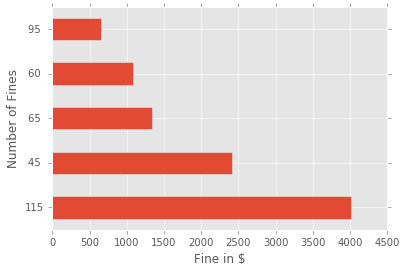

In [97]:
new_df['All Other Areas clean'].value_counts().head(5).plot(kind='barh')
plt.ylabel('Number of Fines')
plt.xlabel('Fine in $')


# 12. What time of day do people usually get their tickets? You can break the day up into several blocks - for example 12am-6am, 6am-12pm, 12pm-6pm, 6pm-12am.


In [98]:
new_df['Violation Time clean']

0       07:52AM
1       12:40PM
2       12:43PM
3       14:32PM
4       10:37AM
5       11:19AM
6       19:42PM
7       01:30AM
8       15:44PM
9       13:15PM
10      21:45PM
11      09:53AM
12      10:25AM
13      10:15AM
14      23:50PM
15      04:48AM
16      04:42AM
17      02:46AM
18      16:52PM
19      16:10PM
20      09:40AM
21      09:20AM
22      10:05AM
23      12:14PM
24      07:47AM
25      19:37PM
26      02:38AM
27      19:25PM
28      15:13PM
29      14:30PM
         ...   
9816    23:08PM
9817    12:19PM
9818    01:43AM
9819    01:20AM
9820    22:30PM
9821    08:25AM
9822    06:10AM
9823    13:06PM
9824    06:32AM
9825    03:30AM
9826    09:20AM
9827    08:45AM
9828    19:50PM
9829    19:35PM
9830    10:07AM
9831    05:40AM
9832    22:55PM
9833    16:40PM
9834    20:12PM
9835    20:12PM
9836    19:31PM
9837    16:40PM
9838    06:40AM
9839    04:28AM
9840    01:52AM
9841    08:22AM
9842    08:31AM
9843    00:45AM
9844    21:40PM
9845    16:28PM
Name: Violation Time cle

In [99]:
def hour_to_time_of_day(x):
    try:
        time = int(x[:2])

        if time  <= 5:
            return 'night'
        elif time <= 12:
            return 'morning'
        elif time <= 18:
            return 'afternoon'
        elif time <= 23:
            return 'evening'
        else:
            pass
    except:
        pass

In [100]:
time_of_day = new_df['Violation Time clean'].apply(hour_to_time_of_day)


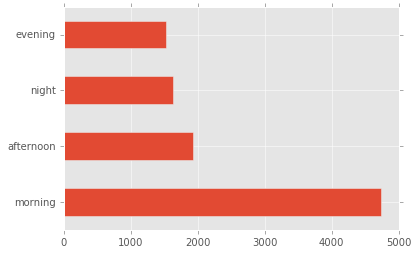

In [101]:
time_of_day.value_counts().head(5).plot(kind='barh')



# 13. What's the average ticket cost in NYC?


In [102]:
new_df['All Other Areas clean int'].mean()

84.365144378455867

# 14. Make a graph of the number of tickets per day.


In [103]:
plt.style.available

['seaborn-darkgrid',
 'classic',
 'seaborn-pastel',
 'fivethirtyeight',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-poster',
 'seaborn-bright',
 'seaborn-muted',
 'dark_background',
 'seaborn-notebook',
 'ggplot',
 'seaborn-ticks',
 'seaborn-deep',
 'bmh',
 'seaborn-dark',
 'seaborn-whitegrid',
 'seaborn-colorblind',
 'seaborn-paper',
 'grayscale',
 'seaborn-white']

[]

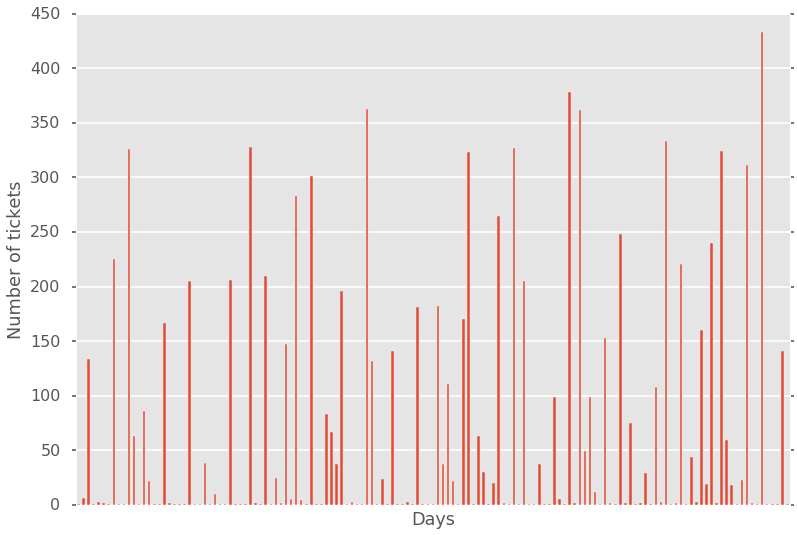

In [254]:
plt.style.use('seaborn-poster')

graph_daily_tickets= new_df['Issue Date'].value_counts(sort=False).plot(kind='bar')
plt.ylabel('Number of tickets')
plt.xlabel('Days')
graph_daily_tickets.axes.get_xaxis().set_ticks([])


# 15. Make a graph of the amount of revenue collected per day.


# 16. Manually construct a dataframe out of https://dmv.ny.gov/statistic/2015licinforce-web.pdf (only NYC boroughts - bronx, queens, manhattan, staten island, brooklyn), having columns for borough name, abbreviation, and number of licensed drivers.


# 17. What's the parking-ticket-$-per-licensed-driver in each borough of NYC? Do this with pandas and the dataframe you just made, not with your head!


In [ ]:
#I am still working on this HW! just uploaded what I have so far in case you were grading this weekend ! :)! 